# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from sklearn.neighbors.kde import KernelDensity

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [2]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    n = np.array(size).prod()
    return (coin(size=n * precision).reshape(n, precision) * np.logspace(1, precision, num=precision, base=.5)).sum(axis=1).reshape(size)

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

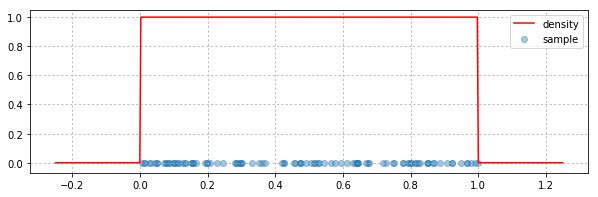

In [3]:
# размер выборки и сетка для графика
size = 100
grid = np.linspace(-0.25, 1.25, 500)

# график
plt.figure(figsize=(10, 3))
plt.scatter(# <Сгенерируйте выборку размера size точности 50>,
            uniform(size, 50),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         # <Посчитайте плотность в точках grid, используя sps.uniform.pdf>,
         sps.uniform.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

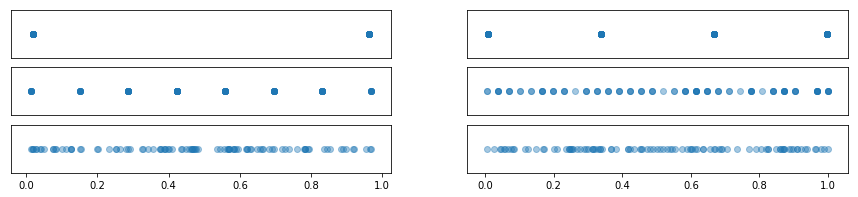

In [4]:
# размер выборки
size = 100

# графики
plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(# <Сгенерируйте выборку размера size точности precision>,
                uniform(size, precision),
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

Независимо от precision у нас получается дискретное равномерное распределение на множестве $\{0, \frac{1}{n}, \frac{2}{n}, ..., \frac{n-1}{n}, 1\}$, где $n = 2^{precision}$. При больших значениях precision это дискретное распределение становится похоже на непрерывное равномерное.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [5]:
def normal(size=1, loc=0, scale=1, precision=30):
    return loc + np.cos(2 * math.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision))) * scale

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

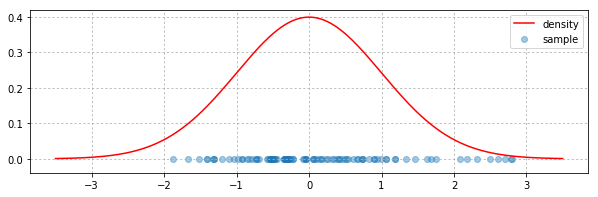

In [6]:
# размер выборки и сетка для графика
size = 100
grid = np.linspace(-3.5, 3.5, 500)

# график
plt.figure(figsize=(10, 3))
plt.scatter(normal(size, 0, 1, 50), np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

$P_{a,\sigma}(B) = P(\frac{B-a}{\sigma})$  
$F_{a,\sigma}(x) = P_{a,\sigma}((-\inf, x]) = P(\frac{(-\inf, x]-a}{\sigma}) = P((-\inf, \frac{x-a}{\sigma}]) = F(\frac{x-a}{\sigma})$  
$\rho_{a,\sigma}(x) = (F_{a,\sigma})'_x = (F(\frac{x-a}{\sigma}))'_x = \frac{1}{\sigma}((F'_x)\bigr\rvert_\frac{x-a}{\sigma}) = \frac{\rho(\frac{x-a}{\sigma})}{\sigma}$  

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

$P$ --- стандартное нормальное распределение.  
$P \sim \mathcal{N}(0, 1)$  
$\rho(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$  
$\rho_{a, \sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^2}{2\sigma^2}}$  
Значит $P_{a, \sigma} \sim \mathcal{N}(a, \sigma^2)$ и  
$\{\mathcal{N}(a, \sigma^2)\ |\ a \in \mathbb{R}, \sigma \in \mathbb{R}^+\}$ --- параметрическое семейство распределений  
Параметр $a$ в этом случае является математическим ожиданием распределения $P_{a, \sigma}$

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

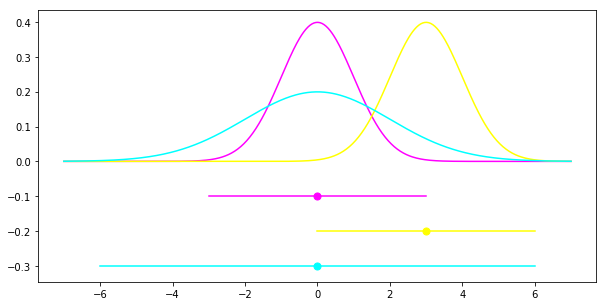

In [7]:
# сетка для графика
grid = np.linspace(-7, 7, 500)

# график
plt.figure(figsize=(10, 5))
for i, (a, sigma, color) in enumerate(((0, 1, 'magenta'), (3, 1, 'yellow'), (0, 2, 'cyan')), 1):
    # плотность
    plt.plot(grid, sps.norm.pdf(grid, a, sigma), color=color, label='density')
    # 3\sigma интервал
    y = -0.1 * i
    plt.plot([a - 3 * sigma, a + 3 * sigma], [y, y], color=color)
    # среднее значение
    plt.scatter(a, y, color=color, s=50)
plt.show()

**Вывод:**

С помощью выборки из равномерного распределения можно успешно сгенерировать выборку из нормального распределения. Также можно сделать вывод, что плотность нормального распределения $\mathcal{N}(a, \sigma^2)$ вне интервала $(a - 3\sigma,\ a + 3\sigma)$ практически равна нулю. Она симметрична относительно точки $a$, и чем ближе к точке $a$, тем она больше.

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [8]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

Пусть $S$ --- матрица ковариаций, а $a$ --- математическое ожидание многомерного нормального распределения. В курсе теории вероятностей доказывалось, что можно разложить $S = R^T D R$, где $R$ --- ортогональная матрица, а $D$ --- диагональная матрица собственных значений, а также что если $\eta$ --- случайный вектор с независимыми компонентами, каждая из которых имеет стандартное нормальное распределение, то $\xi = a + R^{-1}\sqrt{D}\eta$ --- многомерное нормальное распределение с параметрами $(S, a)$

In [9]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    # генерируем выборку
    n = mean.shape[0]
    # собственные значения и собственные векторы для матрицы cov_matrix
    eigenvalues, eigenvectors = eigh(cov_matrix)
    # диагональная матрица из собственных значений
    D = np.diag(eigenvalues)
    # Ортогональная матрица
    R = eigenvectors
    # возвращаем многомерное нормальное распределение, посчитанное по формуле, приведённой в ячейке выше
    return mean + (R.T @ np.sqrt(D) @ normal((n, size), precision=precision)).T

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

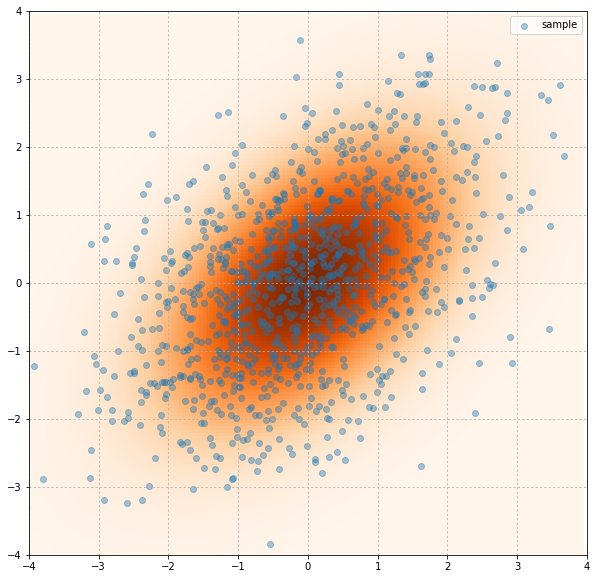

In [10]:
# генерируем выборку
size = 1000
mean = [0, 0]
cov_matrix = [[2, 1], [1, 2]]
sample = gauss(mean, cov_matrix, size, 50)  # Генерация выборки

# сетка для графика и плотность
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
density = sps.multivariate_normal.pdf(np.dstack((grid[0], grid[1])), mean, cov_matrix)

# график
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

С помощью выборки из одномерного нормального распределения можно успешно сгенерировать выборку из многомерного нормального распределения.

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [11]:
def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size, precision)) / lambd

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

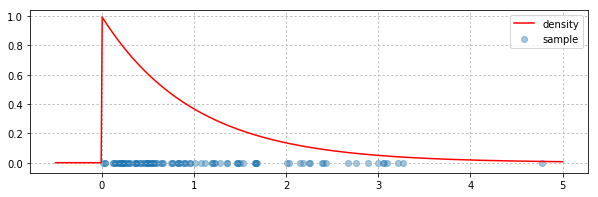

In [12]:
# размер выборки и сетка для графика
size = 100
grid = np.linspace(-0.5, 5, 500)

# график
plt.figure(figsize=(10, 3))
plt.scatter(expon(size, 1, 50), np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, sps.expon.pdf(grid), color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

С помощью выборки из равномерного распределения мы успешно сгенерировали выборку из экспоненциального распределения, используя теоритическия знания по теории вероятности

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

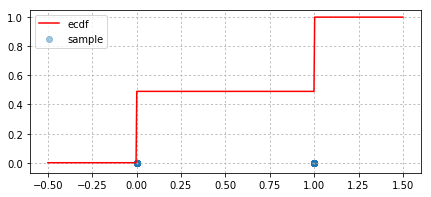

In [14]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [15]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        plt.scatter(# <Первые size точек из sample с нулевой y-координатой>, 
                    sample[:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, 
                     # <Значения функции распределения в точках grid>, 
                     cdf(grid), 
                     color='green', alpha=0.3, lw=2, label='true cdf')
        
        plt.plot(grid, 
                 # <Значения эмпирической функции распределения 
                 # (по первым size точек из sample) в точках grid>, 
                 ECDF(sample[:size])(grid), 
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(# <Постройте гистограмму по первым size точек из sample>, 
                 sample[:size], 
                 # <Установите 20 ячеек>,
                 20,
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, 
                     # <Значения плотности в точках grid>, 
                     pdf(grid),
                     color='green', alpha=0.3, linewidth=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(# <Первые size точек из sample с нулевой y-координатой>, 
                    sample[:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     # <Значения плотности в точках grid>,
                     pdf(grid), 
                     color='green', alpha=0.3, linewidth=2, label='true pdf')
        
        plt.plot(grid,
                 # <Значение ядерной оценки плотности (по первым size точек из sample) 
                 # в точках grid (используйте evaluate)>,
                 kernel_density.evaluate(grid), 
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()

При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py` замените строку 20 на

`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j`

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

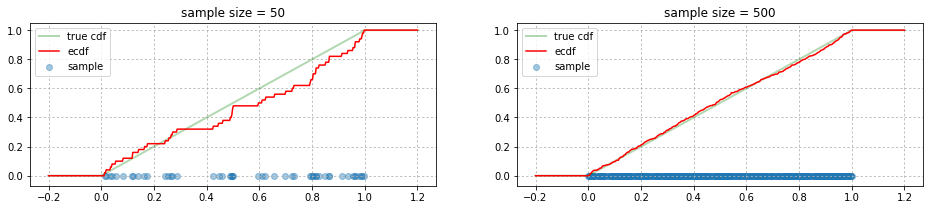

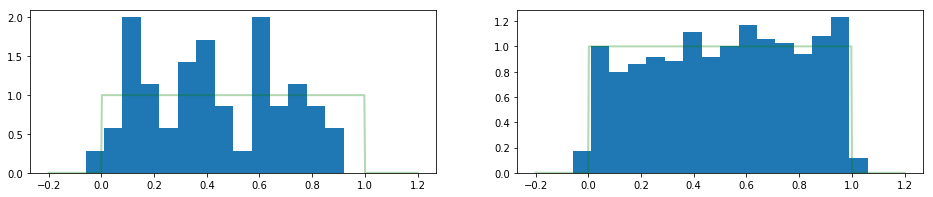

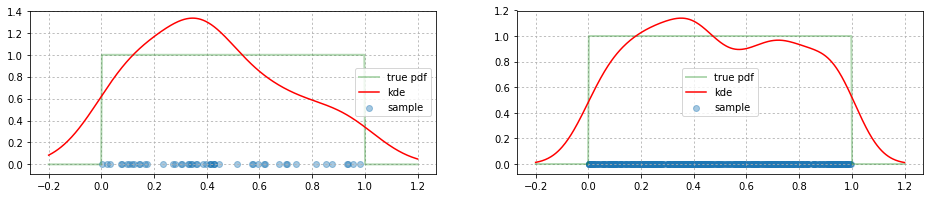

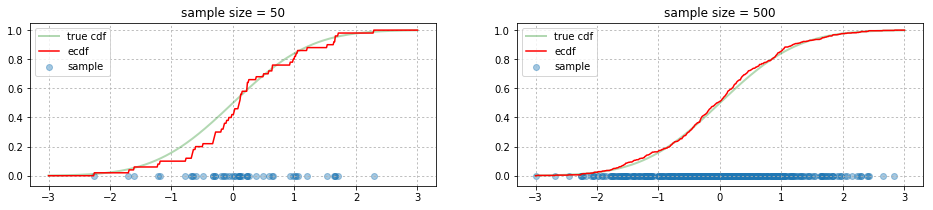

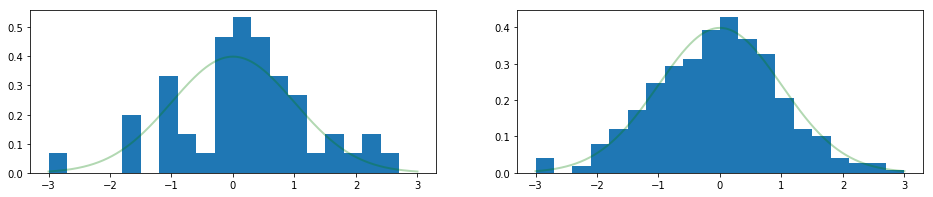

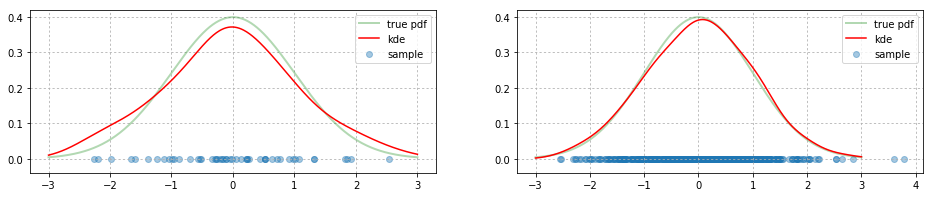

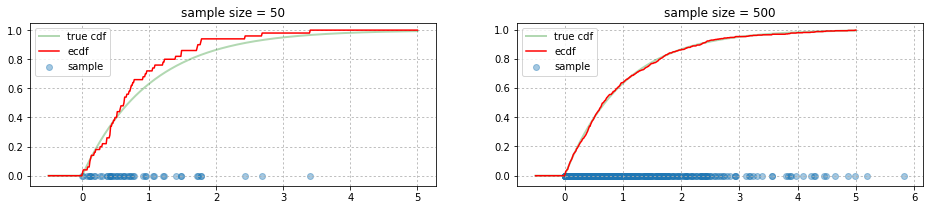

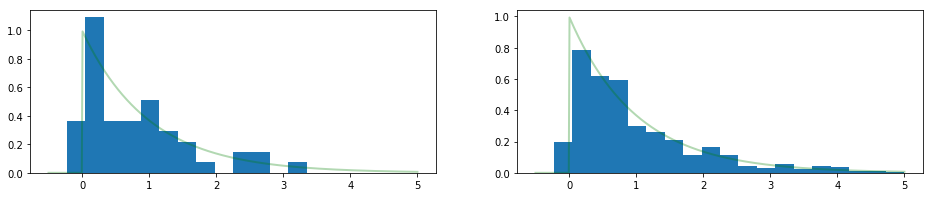

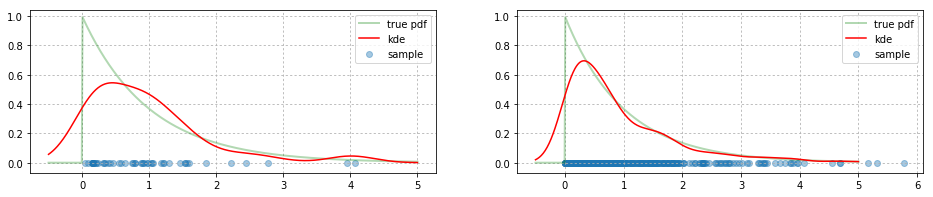

In [16]:
size = 500
for x, y, distribution in ((-0.2, 1.2, sps.uniform), 
                           (-3, 3, sps.norm), 
                           (-0.5, 5, sps.expon)):
    grid = np.linspace(x, y, 500)
    draw_ecdf(distribution.rvs(size=size), grid, distribution.cdf)
    draw_hist(distribution.rvs(size=size), grid, distribution.pdf)
    draw_pdf(distribution.rvs(size=size), grid, distribution.pdf)

**Вывод:**

Мы успешно построили эмпирическую функцию распределения, гистограмму и ядерную оценку плотности для выборок из трёх распределений. ЭФР примерно совпадает с графиком функции распределения, гистограмма и ядерная оценка плотности примерно совпадают с графиком плотности. Чем больше размер выборки, тем лучше совпадение.

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

Обе функции $F^*$ и $F$ монотонно неубывают, а $F^*$ меняется в конечном числе точек, значит достаточно считать супремум по точкам, в которых меняется $F^*$

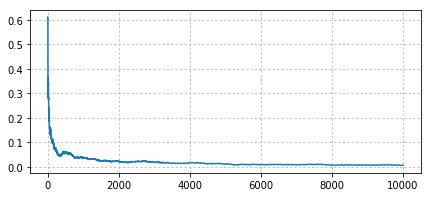

In [17]:
size = 10000
sample = sps.norm.rvs(size=size)
eps = 10 ** -10

supremums = []
for n in range(1, size + 1):
    part_of_sample = sample[:n]
    ecdf = ECDF(part_of_sample)
    supremum = max([np.abs(ecdf(part_of_sample + offset) - sps.norm.cdf(part_of_sample)).max() for offset in (-eps, 0)])
    supremums.append(supremum)

plt.figure(figsize=(7, 3))
plt.plot(np.arange(size) + 1, supremums)
plt.grid(ls=':')
plt.show()

$D_n$ действительно стремится к нулю.

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

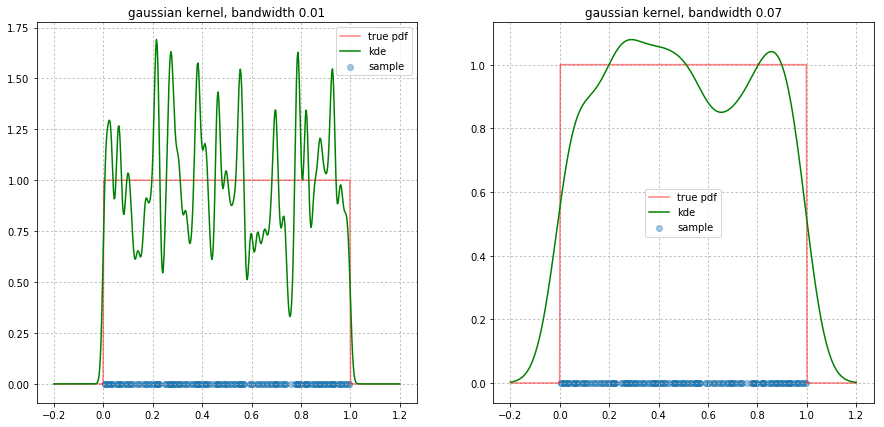

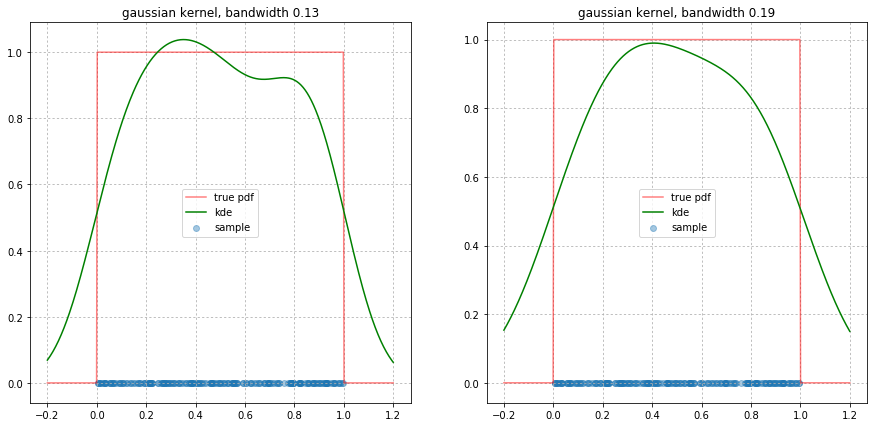

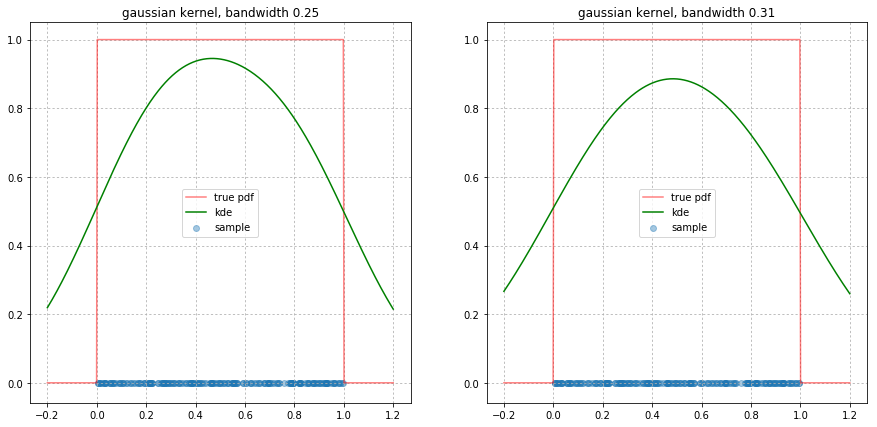

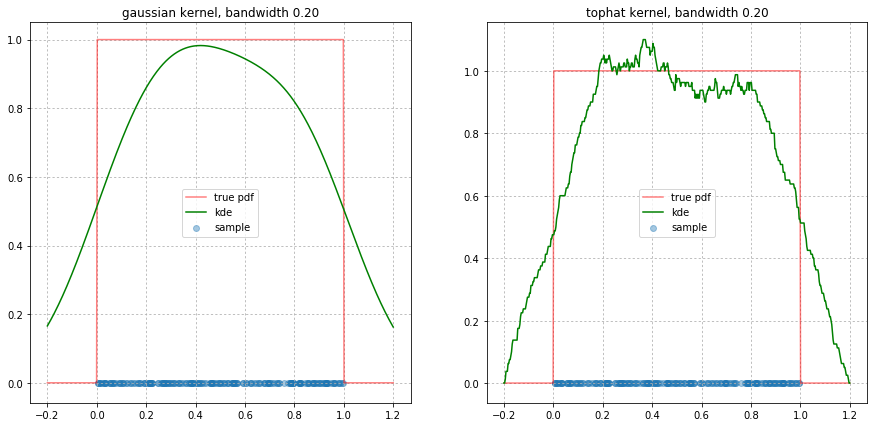

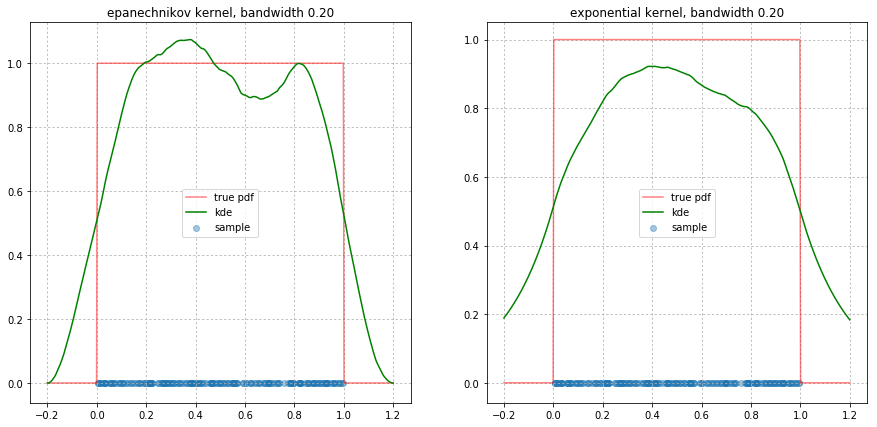

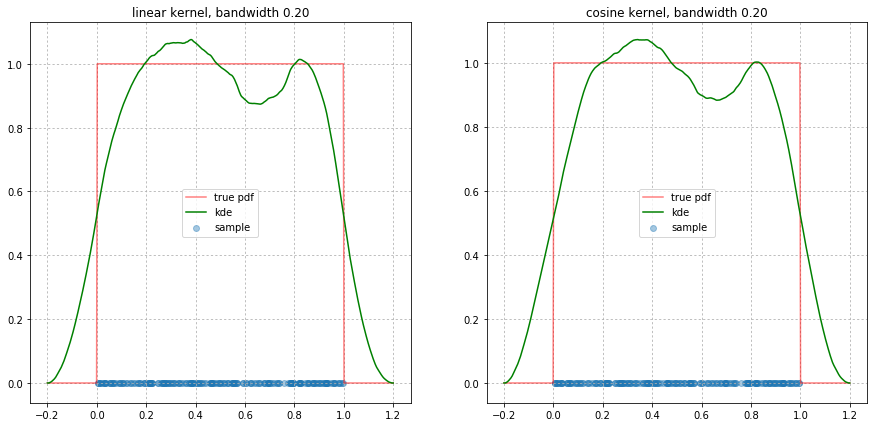

In [18]:
# генерируем выборку
size = 200
sample = sps.uniform.rvs(size=size)
grid = np.linspace(-0.2, 1.2, 500)

# создаём массив parameters --- [(<kernel>, <bandwidth>)]
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidthes = np.linspace(0.01, 0.31, 6)
parameters = [('gaussian', bandwidth) for bandwidth in bandwidthes] + [(kernel, 0.2) for kernel in kernels]

# итерируемя по параметрам
for i, (kernel, bandwidth) in enumerate(parameters):
    # график в два столбца
    if i % 2 == 0:
        plt.figure(figsize=(15, 7))
    # получаем ядерную оценку плотности
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(sample.reshape(-1, 1))
    # график в два столбца
    plt.subplot(1, 2, i % 2 + 1)
    # наносим точки выборки
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
    # строим график истинной плотности
    plt.plot(grid, sps.uniform.pdf(grid), color='red', alpha=0.5, label='true pdf')
    # строим график ядерной оценки плотности
    plt.plot(grid, np.exp(kde.score_samples(grid.reshape(-1, 1))), color='green', label='kde')
    # описание графика
    plt.legend()
    plt.grid(ls=':')
    plt.title('{} kernel, bandwidth {:.2f}'.format(kernel, bandwidth))
    # график в два столбца
    if i % 2 == 1:
        plt.show()

Ядерные оценки плотности достаточно точно оценивают истинную плотность. Ширина ядра влияет на гладкость получившейся плотности. Тип ядра влияет на вид получившейся плотности.

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

In [19]:
# Считываем значения площадей из файла
import pandas as pd
countries = pd.read_csv('countries.csv', sep='\t')
areas = countries.values[:, 2].astype(np.float)

# Определяем некоторые параметры для графика
size = len(areas)
xmax = 10 ** 6
xmin = -xmax / 50
grid = np.linspace(0, xmax, 5000)

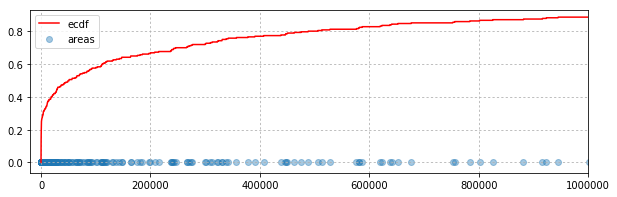

In [20]:
# Строим график ЭФР
plt.figure(figsize=(10, 3))
plt.scatter(areas, np.zeros(size), alpha=0.4, label='areas')
plt.plot(grid, ECDF(areas)(grid), color='red', label='ecdf')
plt.xlim(xmin, xmax)
plt.legend()
plt.grid(ls=':')
plt.show()

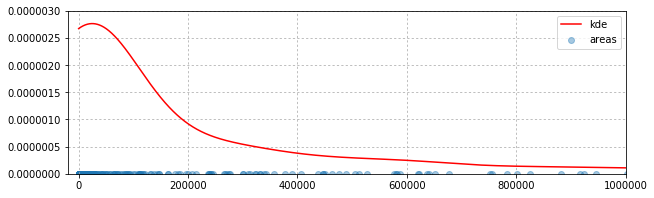

In [21]:
# Находим ядерную оценку плотности
kernel_density = KDEUnivariate(areas)
kernel_density.fit()

# Строим график ядерной оценки плотности
plt.figure(figsize=(10, 3))
plt.scatter(areas, np.zeros(size), alpha=0.4, label='areas')
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.xlim(xmin, xmax)
plt.ylim(0, .000003)
plt.legend()
plt.grid(ls=':')
plt.show()

Мы успешно построили эмпирическую функцию распределения и ядерную оценку плотности. Далее можно сравнить их с некоторыми известными распределениями, чтобы попробовать описать природу распределения.

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

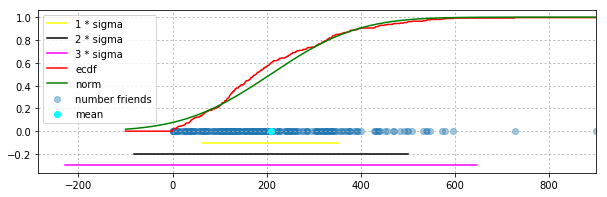

In [22]:
# Считываем выборку из файла
file = open('friends.csv')
lines = file.readlines()
sample = np.array([int(line) for line in lines])

# Определяем некоторые параметры для графика
size = len(sample)
mean = sample.mean()
sigma = sample.std()
xmax = sample.max()
grid = np.linspace(-100, xmax, 1000)

# Строим график ЭФР
plt.figure(figsize=(10, 3))
# Число друзей
plt.scatter(sample, np.zeros(size), alpha=0.4, label='number friends')
# Среднее выборки
plt.scatter(sample.mean(), 0, color='cyan', label='mean')
# 3\sigma интервал
for i, color in ((1, 'yellow'), (2, 'black'), (3, 'magenta')):
    plt.plot([mean - i * sigma, mean + i * sigma], np.array([-0.1, -0.1]) * i, color=color, label=str(i) + ' * sigma')
# ЭФР
plt.plot(grid, ECDF(sample)(grid), color='red', label='ecdf')
# Нормальное распределение с параметрами --- выборочное среднее и дисперсия
plt.plot(grid, sps.norm.cdf(grid, loc=sample.mean(), scale=sample.std()), color='green', label='norm')
plt.xlim(xmax=xmax)
plt.legend()
plt.grid(ls=':')
plt.show()

Выборка составлялась из всех участников группы "2 курс ФИВТ". На графике также нанесена функция нормального распределения. Видно, что она очень похожа на эмпирическую функцию распределения числа друзей, так что можно сделать вывод, что распределение числа друзей примерно является нормальным распределением.